In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Check version of TensorFlow

In [2]:
tf.__version__

'2.7.0'

# Dataset

## Load dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# Train/test data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train)
print(y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 0 0 ... 3 0 5]


0: Áo phông / Áo sơ mi

1: Ống quần

2: Kéo qua

3: Trang phục

4: Áo choàng

5: Sandal

6: Áo sơ mi

7: Giày thể thao

8: Túi

9: Ủng cổ chân



In [5]:
print("Size of each examole: 28x28")
print("Size of train set:", X_train.shape[0])
print("Size of test set:", X_test.shape[0])

Size of each examole: 28x28
Size of train set: 60000
Size of test set: 10000


## Show some images in train set

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

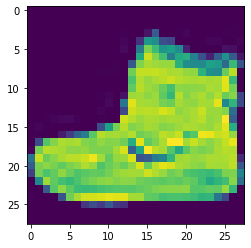

In [7]:
plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Data for train/test must be a 28x28 dimension of matrix which each element is in [0, 1]
X_train = X_train/255.0
X_test = X_test/255.0

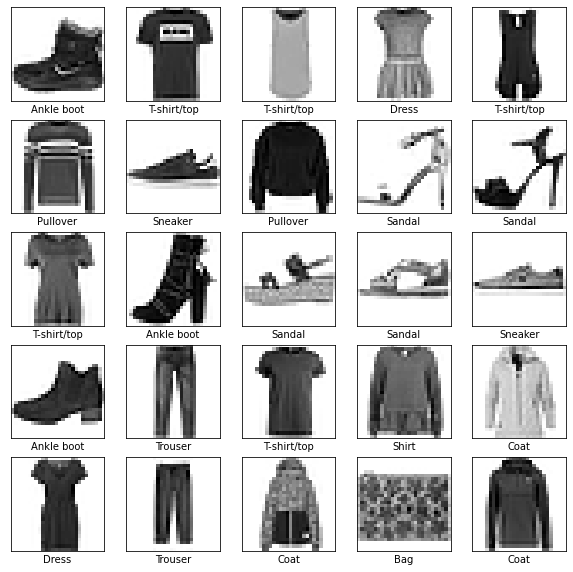

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

# Build a model

## Create a model

In [10]:
# Create a simple model with X is a 784 vector (flatten from a 28x28 dimension of matrix) and each layer is connected by dense
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])
# This model have input is a 784 vector, 1 hidden layer which size is 128 neron, output layer has 10 classes

## Compile this model

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Train model

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5009 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3717 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3109 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

## Test model on test set

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 0s - loss: 0.3400 - accuracy: 0.8850 - 407ms/epoch - 1ms/step
Test accuracy: 0.8849999904632568


In [14]:
# The prediction is base on the highest value of output vector
prediction = model.predict(X_test)

print("Output vector:", prediction[2])
print("My predict:", np.argmax(prediction[2]))
print("Actual:", y_test[2])

Output vector: [ -0.21056086  15.246064    -7.4656806   -2.8656132   -7.0912113
 -30.14954     -6.497129   -44.62328    -17.446089   -31.22498   ]
My predict: 1
Actual: 1


In [15]:
# Now, for visualizing our outpur vector to a vector which each value on it represents in [0, 1] - as probability
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])
# In the output vector, each value is in [0, 1], it represents the prob of each class that the image will be it

In [16]:
prob_prediction = probability_model.predict(X_test)
print("Output prob vector:", prob_prediction[2])
print("My prediction:", np.argmax(prob_prediction[2]))
print("Actual", y_test[2])

Output prob vector: [1.9376394e-07 9.9999976e-01 1.3690354e-10 1.3620669e-08 1.9908751e-10
 1.9272583e-20 3.6062123e-10 9.9787161e-27 6.3383734e-15 6.5747995e-21]
My prediction: 1
Actual 1


## Visualize result

In [21]:
def plot_image(index, predictions_array, true_label, img):
  true_label, img = true_label[index], img[index]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  prediction_label = np.argmax(predictions_array)
  if (prediction_label==true_label):
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[prediction_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

# More ... !
def plot_value_array(index, predictions_array, true_label):
  true_label = true_label[index]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predictions_label = np.argmax(predictions_array)

  thisplot[predictions_label].set_color('red')
  thisplot[true_label].set_color('blue')

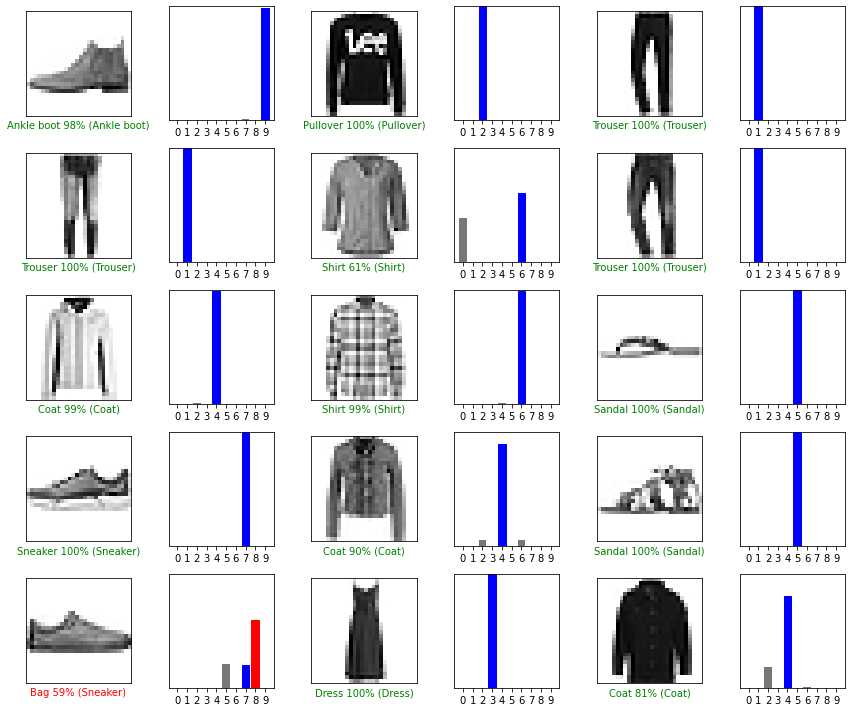

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prob_prediction[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prob_prediction[i], y_test)
plt.tight_layout()
plt.show()